# Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import pandas as pd

# Import data

In [9]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


# Some descriptive statistics

In [11]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [12]:
df.groupby('variation').describe()

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback                                     \
                              max    count      mean       std  min  25%  50%   
variation                                                                       
Black                         5.0    261.0  0.865900  0.341414  0.0  1.0  1.0   
Black  Dot                    5.0    516.0  0.930233  0.255002  0.0  1.0  1.0   
Black  Plus                   5.0    270.0  0.896296  0.305442  0.0  1.0  1.0   
Black  Show                   5.0    265.0  0.932075  0.252092  0.0  1.0  1.0   
Black  Spot                   5.0    241.0  0.867220  0.340043  0.0  1.0  1.0   
Charcoal Fabric               5.0    430.0  0.972093  0.164898  0.0  1.0  1.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  0.271682  0.0  1.0  1.0   
Heather Gray Fabric           5.0    157.0  0.987261  0.112504  0.0  1.0  1.0   
Oak Finish                    5.0     14.0  1.000000  0.000000  1.0  1.0  1.0   
Sandstone Fabric              5.0     90.0  0.933333  0.250841  0.0  1.0  1.0   
Walnut Finish                 5.0      9.0  1.000000  0.000000  1.0  1.0  1.0   
White                         5.0     91.0  0.813187  0.391921  0.0  1.0  1.0   
White  Dot                    5.0    184.0  0.934783  0.247583  0.0  1.0  1.0   
White  Plus                   5.0     78.0  0.897436  0.305352  0.0  1.0  1.0   
White  Show                   5.0     85.0  0.870588  0.337647  0.0  1.0  1.0   
White  Spot                   5.0    109.0  0.889908  0.314450  0.0  1.0  1.0   

                                        
                              75%  max  
variation                               
Black                         1.0  1.0  
Black  Dot                    1.0  1.0  
Black  Plus                   1.0  1.0  
Black  Show                   1.0  1.0  
Black  Spot                   1.0  1.0  
Charcoal Fabric               1.0  1.0  
Configuration: Fire TV Stick  1.0  1.0  
Heather Gray Fabric           1.0  1.0  
Oak Finish                    1.0  1.0  
Sandstone Fabric              1.0  1.0  
Walnut Finish                 1.0  1.0  
White                         1.0  1.0  
White  Dot                    1.0  1.0  
White  Plus                   1.0  1.0  
White  Show                   1.0  1.0  
White  Spot                   1.0  1.0

array([[<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Black  Dot'}>,
        <AxesSubplot:title={'center':'Black  Plus'}>,
        <AxesSubplot:title={'center':'Black  Show'}>],
       [<AxesSubplot:title={'center':'Black  Spot'}>,
        <AxesSubplot:title={'center':'Charcoal Fabric '}>,
        <AxesSubplot:title={'center':'Configuration: Fire TV Stick'}>,
        <AxesSubplot:title={'center':'Heather Gray Fabric '}>],
       [<AxesSubplot:title={'center':'Oak Finish '}>,
        <AxesSubplot:title={'center':'Sandstone Fabric '}>,
        <AxesSubplot:title={'center':'Walnut Finish '}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'White  Dot'}>,
        <AxesSubplot:title={'center':'White  Plus'}>,
        <AxesSubplot:title={'center':'White  Show'}>,
        <AxesSubplot:title={'center':'White  Spot'}>]], dtype=object)

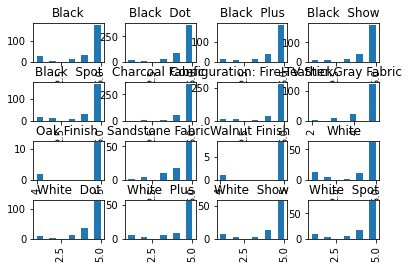

In [13]:
df['rating'].hist(by=df['variation'])

array([[<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Black  Dot'}>,
        <AxesSubplot:title={'center':'Black  Plus'}>,
        <AxesSubplot:title={'center':'Black  Show'}>],
       [<AxesSubplot:title={'center':'Black  Spot'}>,
        <AxesSubplot:title={'center':'Charcoal Fabric '}>,
        <AxesSubplot:title={'center':'Configuration: Fire TV Stick'}>,
        <AxesSubplot:title={'center':'Heather Gray Fabric '}>],
       [<AxesSubplot:title={'center':'Oak Finish '}>,
        <AxesSubplot:title={'center':'Sandstone Fabric '}>,
        <AxesSubplot:title={'center':'Walnut Finish '}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'White  Dot'}>,
        <AxesSubplot:title={'center':'White  Plus'}>,
        <AxesSubplot:title={'center':'White  Show'}>,
        <AxesSubplot:title={'center':'White  Spot'}>]], dtype=object)

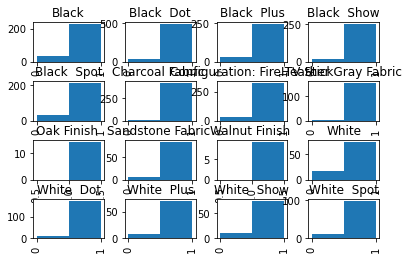

In [14]:
df['feedback'].hist(bins=2, by=df['variation'])

# Data Cleaning

## Delete Punctuations

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#first join all reviews
reviews = df['verified_reviews'].tolist()
len(reviews)

3150

In [17]:
reviews_in_one_string =" ".join(reviews)
reviews_in_one_string[:100]

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alex'

In [18]:
no_strings_attached = [ char for char in reviews_in_one_string if char not in string.punctuation ]
no_strings_attached = ''.join(no_strings_attached)
no_strings_attached[:100]

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa s'

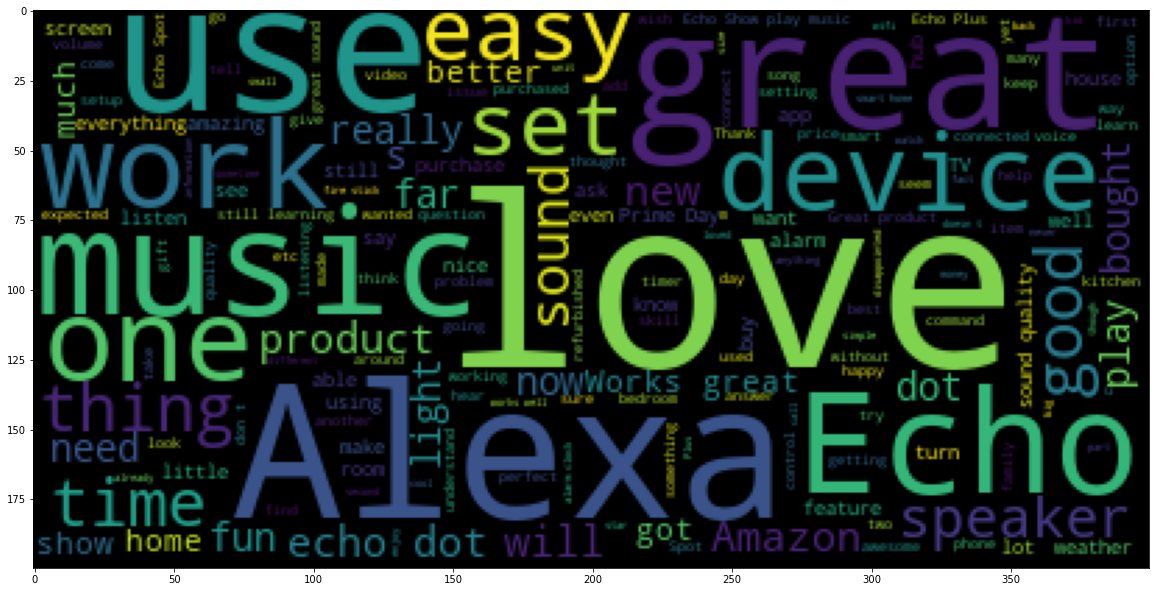

In [19]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(reviews_in_one_string))

## Delete Stopwords

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lesleypotters/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [24]:
all_clean = [word for word in reviews_in_one_string.split() if word.lower() not in stopwords.words('english') ]
all_clean = ' '.join(all_clean)
all_clean[:100]

'Love Echo! Loved it! Sometimes playing game, answer question correctly Alexa says got wrong answers '

# Generate WordCloud

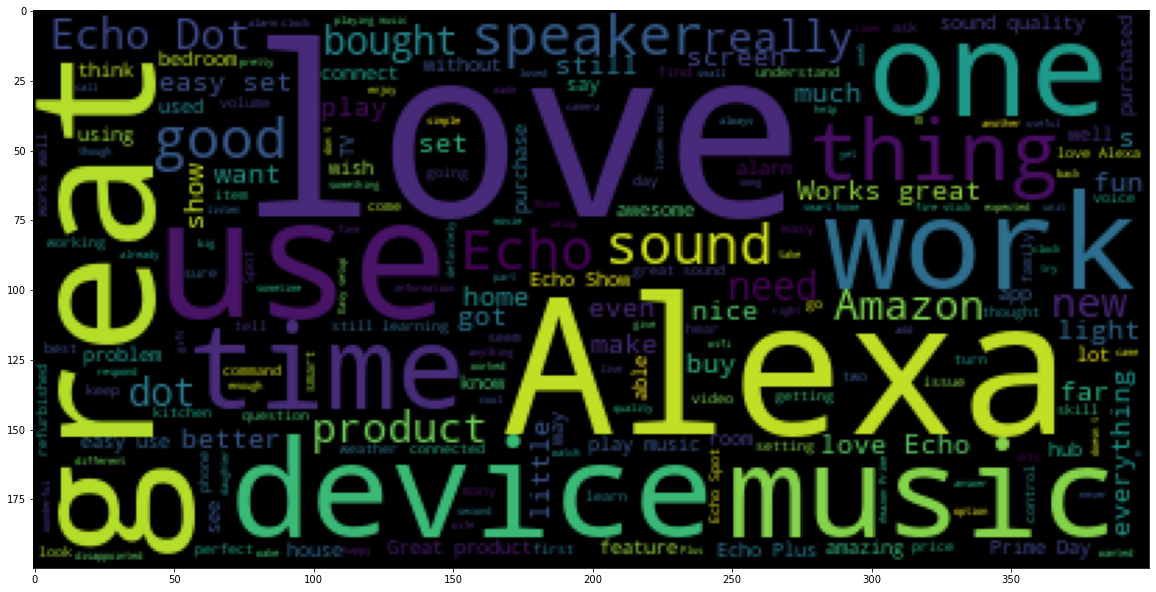

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(all_clean))

# Model for Sentiment Analysis

## Preparations: pipeline with both taking out stopwords and punctuation

In [26]:
def cleanText(text):
  cleanTxt = [ char for char in text if char not in string.punctuation ]
  cleanTxt_join = ''.join(cleanTxt)
  cleanTxt_join_clean = [word for word in cleanTxt_join.split() if word.lower() not in stopwords.words('english') ]
  return cleanTxt_join_clean


In [27]:
df_clean = df['verified_reviews'].apply(cleanText)

In [28]:
type(df_clean)

pandas.core.series.Series

# Tokenization

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = cleanText, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [31]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/Users/lesleypotters/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
reviews_countvectorizer.shape

(3150, 5211)

In [34]:
X = pd.DataFrame(reviews_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = df['feedback']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [36]:
X.shape

(3150, 5211)

In [37]:
y.shape

(3150,)

# Naive Bayesian Model

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [39]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

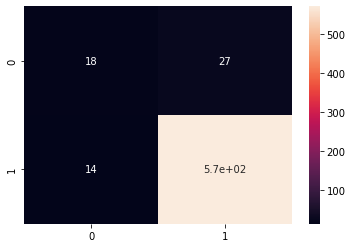

In [41]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.56      0.40      0.47        45
           1       0.95      0.98      0.97       585

    accuracy                           0.93       630
   macro avg       0.76      0.69      0.72       630
weighted avg       0.93      0.93      0.93       630



# Logistic Regression

              precision    recall  f1-score   support

           0       0.72      0.29      0.41        45
           1       0.95      0.99      0.97       585

    accuracy                           0.94       630
   macro avg       0.83      0.64      0.69       630
weighted avg       0.93      0.94      0.93       630



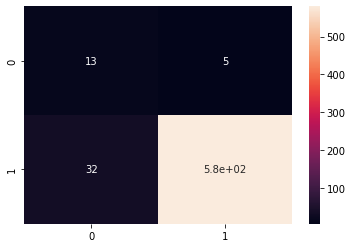

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Gradient Boosting

In [46]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


              precision    recall  f1-score   support

           0       0.53      0.18      0.27        45
           1       0.94      0.99      0.96       585

    accuracy                           0.93       630
   macro avg       0.74      0.58      0.61       630
weighted avg       0.91      0.93      0.91       630



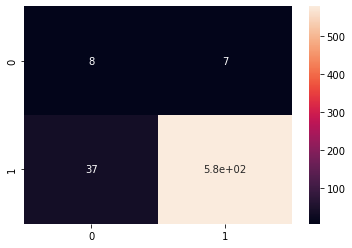

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [48]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
#p_test3 = {'learning_rate':[0.15,0.001], 'n_estimators':[100,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [49]:
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 1500}, 0.9361111111111112)

In [50]:
tuning.cv_results_

{'mean_fit_time': array([0.46284366, 1.00491381, 1.99589272, 2.99197702, 3.96504412,
        4.93071618, 5.97537284, 6.94712949, 0.42243261, 1.01552529,
        1.98507619, 2.96670542, 3.97571321, 4.98586373, 6.03481822,
        7.50650735, 0.47290835, 1.01325483, 2.00962062, 3.02214303,
        4.00788131, 5.01904669, 5.97582469, 6.99717345, 0.44168892,
        1.04208841, 2.03270178, 3.06201258, 4.00827918, 5.00991817,
        5.92835469, 6.93364377, 0.4282928 , 1.02128448, 2.00309014,
        2.99692397, 3.98552012, 4.98930078, 5.98038902, 6.95402985,
        0.42958808, 1.0206912 , 2.01660581, 3.02002425, 4.00245342,
        5.03911347, 6.06704736, 6.88297024]),
 'std_fit_time': array([0.01735981, 0.00476472, 0.00990331, 0.01206279, 0.02823839,
        0.03108273, 0.04563328, 0.06075259, 0.00132083, 0.01031119,
        0.00522564, 0.00510724, 0.02282303, 0.02236091, 0.05415478,
        0.2900075 , 0.0775354 , 0.00280579, 0.01605852, 0.02632116,
        0.02074344, 0.02994071, 0.024

In [51]:
tuning.best_estimator_

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=1500,
                           random_state=10, subsample=1)

In [52]:
model2 = GradientBoostingClassifier(learning_rate=0.15, max_depth=4, max_features='sqrt',
                           n_estimators=1250, random_state=10, subsample=1)

              precision    recall  f1-score   support

           0       0.66      0.42      0.51        45
           1       0.96      0.98      0.97       585

    accuracy                           0.94       630
   macro avg       0.81      0.70      0.74       630
weighted avg       0.94      0.94      0.94       630



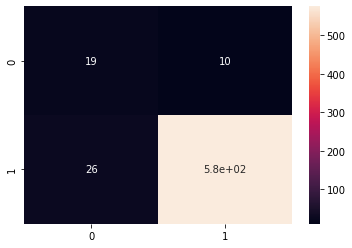

In [53]:
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))